# Messing up with Gaussians

## 1) Visualizing a 2D Gaussian

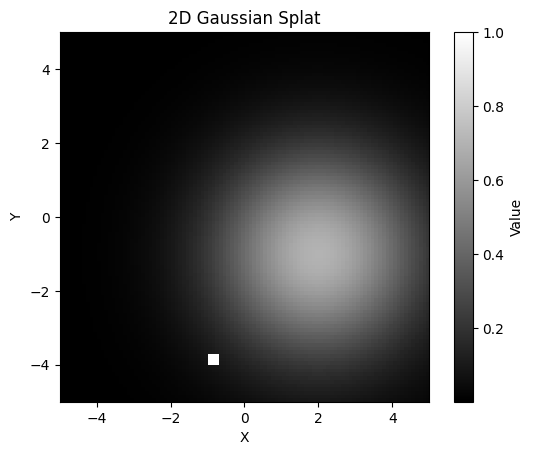

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 2D grid
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
xx, yy = np.meshgrid(x, y)

# Parameters for the Gaussian
cx, cy = 2, -1  # Center
sigma = 2.0    # Spread
weight = 0.7   # Peak value

# Gaussian formula
gaussian = weight * np.exp(-((xx - cx)**2 + (yy - cy)**2) / (2 * sigma**2))

# Placing a square
squarey, squarex, squaredim = 10, 40, 3
gaussian[squarey:squarey+squaredim, squarex:squarex+squaredim] = 1

# Plot
plt.imshow(gaussian, extent=(-5, 5, -5, 5), origin="lower", cmap="gray")
plt.colorbar(label="Value")
plt.title("2D Gaussian Splat")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [26]:
gaussian[50,50]

0.37920194805292307

## 2) When we have multiple 2D Gaussians
- we sum them all up for all the pixels in the image

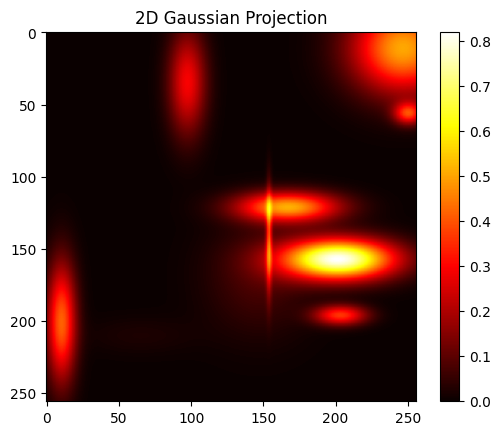

In [33]:
import numpy as np

# Example data
image_size = (256, 256)
num_gaussians = 10
image = np.zeros(image_size)

# Example Gaussian parameters
rho = np.random.rand(num_gaussians)  # Amplitudes
p = np.random.rand(num_gaussians, 2) * image_size[0]  # 2D projected centers
sigma = np.random.rand(num_gaussians, 2) * 30  # Covariances (diagonal for simplicity)

# Compute Gaussian contribution for each pixel
x = np.arange(image_size[0])
y = np.arange(image_size[1])
xx, yy = np.meshgrid(x, y)

for i in range(num_gaussians):
    dx = xx - p[i, 0]
    dy = yy - p[i, 1]
    gauss = rho[i] * np.exp(-(dx**2 / (2 * sigma[i, 0]**2) + dy**2 / (2 * sigma[i, 1]**2)))
    image += gauss

# Plot the result
import matplotlib.pyplot as plt
plt.imshow(image, cmap="hot")
plt.colorbar()
plt.title("2D Gaussian Projection")
plt.show()


In [30]:
p

array([[218.47900424, 186.40890226],
       [101.08321533,  21.32782064],
       [126.14921566,  19.26232036],
       [ 76.52709608,  34.45978023],
       [ 82.51041622, 114.9367858 ],
       [ 73.14591866, 116.88329459],
       [226.5678735 , 205.24369371],
       [ 91.72651271, 209.67279269],
       [118.83877875, 153.72764967],
       [ 23.53961226, 176.32684031]])